## 数据增强
### 导入必要模块

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### 图像编码处理
**注意：输入图像为 `jpg` 格式使用 `decode_jpeg` 进行解码，如果输入图像为 `png` 格式，使用 `decode_png`  进行解码**，但实际上两种图片格式与两种解码方式可以混用，至少在本篇混用不会出现任何 bug，当然为了不必要以及莫名的报错，使用对应的函数最好  
TensorFlow1.x 可以使用 `tf.gfile.FastGFile` 或者 `tf.gfile.GFile` 读取文件  
  
**TensorFlow 的图像模式采用 RGB 通道顺序，与 matplotlib 相同**

Instructions for updating:
Use tf.gfile.GFile.
image_data decode type:
 <class 'numpy.ndarray'>
image_data decode shape:
 (554, 578, 3)
image_data decode value:
 [[[ 32  42   7]
  [ 26  36   1]
  [ 20  30   0]
  ...
  [ 59  63  64]
  [ 61  65  66]
  [ 61  65  66]]

 [[112 122  87]
  [107 117  80]
  [101 111  76]
  ...
  [ 66  70  71]
  [ 67  71  72]
  [ 67  71  72]]

 [[114 124  87]
  [110 121  81]
  [105 115  78]
  ...
  [ 69  73  74]
  [ 69  73  74]
  [ 69  73  74]]

 ...

 [[194 185 176]
  [195 186 177]
  [198 189 180]
  ...
  [120 110 108]
  [131 122 117]
  [131 122 117]]

 [[194 185 176]
  [195 186 177]
  [196 187 178]
  ...
  [140 130 128]
  [136 127 122]
  [136 127 122]]

 [[190 181 172]
  [191 182 173]
  [193 184 175]
  ...
  [147 137 135]
  [160 151 146]
  [160 151 146]]]


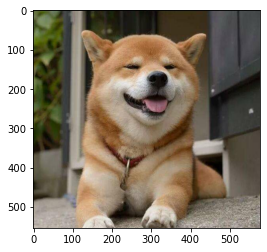

In [2]:
image_raw_data = tf.gfile.FastGFile('./data/dog.jpg', 'rb').read()

img_data = tf.image.decode_jpeg(image_raw_data)

with tf.Session().as_default() as sess:
    img_data_decode = img_data.eval()
    print('image_data decode type:\n', type(img_data_decode))
    print('image_data decode shape:\n', img_data_decode.shape)
    print('image_data decode value:\n', img_data_decode)

    plt.imshow(img_data.eval())
    plt.show()

### 图像缩放函数 tensorflow.image.resize_images()
tf.image.resize_images(  
&ensp;&ensp;&ensp;&ensp;images,  
&ensp;&ensp;&ensp;&ensp;size,  
&ensp;&ensp;&ensp;&ensp;method=ResizeMethodV1.BILINEAR,  
&ensp;&ensp;&ensp;&ensp;align_corners=False,  
&ensp;&ensp;&ensp;&ensp;preserve_aspect_ratio=False,  
&ensp;&ensp;&ensp;&ensp;name=None  
)  
method: 表示缩放时使用的方法，method 可选择方法如下:  
•ResizeMethod.BILINEAR: 双线性插值，method=0   
•ResizeMethod.NEAREST_NEIGHBOR: 最近邻插值 method=1  
•ResizeMethod.BICUBIC: 双立方插值 method=2  
•ResizeMethod.AREA: 像素区域插值 method=3  

images: 4-D 张量[batch, height, width, channels] 或 3-D 张量[height, width, channels]  

size: 宽高尺寸 `new_height, new_width`  

preserve_aspect_ratio: 是否保留长宽比，默认为False，如果设置了此项，则将 images 在 size 保留原始图像的纵横比的同时将其调整为适合的尺寸。如果图像 size 大于当前尺寸，则按比例放大图像 image  

align_corners: 布尔变量，默认False，如果为True，则输入和输出张量的 4 个角像素的中心对齐，并保留角像素处的值(一般忽略这项设置)

name: 命名

返回缩放后的 image，4-D 返回 4-D float 张量[batch, new_height, new_width, channels] 3-D 返回 3-D float 张量[new_height, new_width, channels]

`******************************************************************line******************************************************************`

其中 `resized1 = tf.cast(resized1, tf.int32) resized1 = resized1.eval(session=sess)` 可以替换为 `resized1 = np.asarray(resized1.eval(session=sess), dtype='uint8')`，既然是 TensorFlow 的主场，我们尽量使用 TensorFLow 内部提供的格式转换函数，当然 TensorFlow 对 numpy 的支持也非常友好，**为了节约空间，下面不在输出图像变换后的值**，这里承接上面图像编码处理后的输入值

resize type:
 <class 'numpy.ndarray'>
resize shape:
 (256, 256, 3)


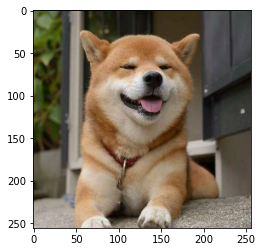

In [3]:
resized0 = tf.image.resize_images(img_data, [256,256], method=0)
resized0 = tf.cast(resized0, tf.int32)
resized0 = resized0.eval(session=sess)
print('resize type:\n', type(resized0))
print('resize shape:\n', resized0.shape)
plt.imshow(resized0)
plt.show()

resize type:
 <class 'numpy.ndarray'>
resize shape:
 (256, 256, 3)


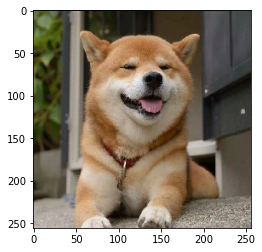

In [4]:
resized1 = tf.image.resize_images(img_data, [256,256], method=1)
resized1 = tf.cast(resized1, tf.int32)
resized1 = resized1.eval(session=sess)
print('resize type:\n', type(resized1))
print('resize shape:\n', resized1.shape)
plt.imshow(resized1)
plt.show()

下面这个双立方插值需要使用 `resized2 = np.asarray(resized2.eval(session=sess), dtype='uint8')`，使用 `resized2 = tf.cast(resized1, tf.int32) resized2 = resized2.eval(session=sess)` 能正常显示，但是会有 `Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).` 弹出，当然也可以用 `resized2 = tf.cast(resized2, tf.uint8) resized2 = resized2.eval(session=sess)`，不信？你可以试一试

resize type:
 <class 'numpy.ndarray'>
resize shape:
 (256, 256, 3)


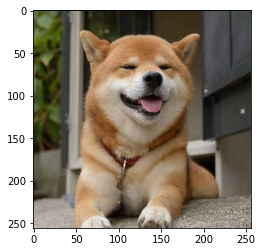

In [5]:
resized2 = tf.image.resize_images(img_data, [256,256], method=2)
resized2 = tf.cast(resized2, tf.uint8)
resized2 = resized2.eval(session=sess)
print('resize type:\n', type(resized2))
print('resize shape:\n', resized2.shape)
plt.imshow(resized2)
plt.show()

resize type:
 <class 'numpy.ndarray'>
resize shape:
 (256, 256, 3)


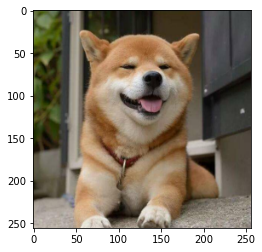

In [6]:
resized3 = tf.image.resize_images(img_data, [256,256], method=3)
resized3 = tf.cast(resized3, tf.int32)
resized3 = resized3.eval(session=sess)
print('resize type:\n', type(resized3))
print('resize shape:\n', resized3.shape)
plt.imshow(resized3)
plt.show()

**记得关闭上一个 Session() 进程哦**

In [7]:
sess.close()

### 图像裁剪函数 tf.image.resize_with_crop_or_pad()  
tf.image.resize_with_crop_or_pad(  
&ensp;&ensp;&ensp;&ensp;image,  
&ensp;&ensp;&ensp;&ensp;target_height,  
&ensp;&ensp;&ensp;&ensp;target_width  
)  
image: 4-D 张量[batch, height, width, channels] 或 三维张量[height, width, channels]  
target_height: 目标高度  
target_width: 目标宽度  
返回裁剪或填充后的 image，4-D 返回 4-D float 张量[batch, new_height, new_width, channels] 3-D 返回 3-D float 张量[new_height, new_width, channels]  
如果**目标尺寸小于原图像，则从中心进行裁剪，反之则用黑色填充**
  
 `******************************************************************line******************************************************************`  
下面我们使用 `dog.png` 为例，切记**在图像格式转换中**，尽量**避免直接修改后缀名**，可以编写**程序进行图像格式转换**，最简单的方法是下载格式工厂，**使用格式工厂进行转换**，而且**格式工厂能进行图像批处理转换**

image_data decode type:
 <class 'numpy.ndarray'>
image_data decode shape:
 (554, 578, 3)
image_data decode value:
 [[[ 32  42   7]
  [ 26  36   1]
  [ 20  30   0]
  ...
  [ 59  63  64]
  [ 61  65  66]
  [ 61  65  66]]

 [[112 122  87]
  [107 117  82]
  [101 111  76]
  ...
  [ 66  70  71]
  [ 67  71  72]
  [ 67  71  72]]

 [[114 125  85]
  [110 121  81]
  [105 116  76]
  ...
  [ 69  73  74]
  [ 69  73  74]
  [ 69  73  74]]

 ...

 [[194 185 176]
  [195 186 177]
  [198 189 180]
  ...
  [120 110 108]
  [131 122 117]
  [131 122 117]]

 [[194 185 176]
  [195 186 177]
  [196 187 178]
  ...
  [140 130 128]
  [136 127 122]
  [136 127 122]]

 [[190 181 172]
  [191 182 173]
  [193 184 175]
  ...
  [147 137 135]
  [160 151 146]
  [160 151 146]]]


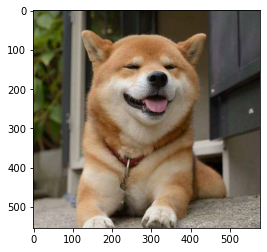

In [8]:
image_raw_data = tf.gfile.FastGFile('./data/dog.png', 'rb').read()

img_data = tf.image.decode_png(image_raw_data)

with tf.Session().as_default() as sess:
    img_data_decode = img_data.eval()
    print('image_data decode type:\n', type(img_data_decode))
    print('image_data decode shape:\n', img_data_decode.shape)
    print('image_data decode value:\n', img_data_decode)

    plt.imshow(img_data.eval())
    plt.show()

resize type:
 <class 'numpy.ndarray'>
resize shape:
 (256, 256, 3)


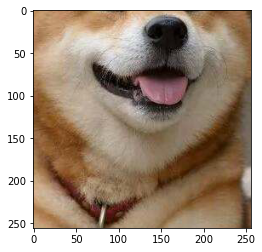

In [9]:
cropped = tf.image.resize_with_crop_or_pad(img_data, 256, 256)
cropped = cropped.eval(session=sess)
print('resize type:\n', type(cropped))
print('resize shape:\n', cropped.shape)
plt.imshow(cropped)
plt.show()

resize type:
 <class 'numpy.ndarray'>
resize shape:
 (800, 800, 3)


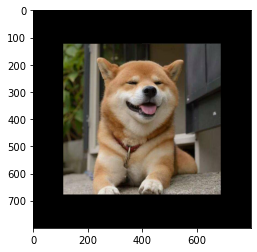

In [10]:
padded = tf.image.resize_image_with_crop_or_pad(img_data, 800, 800)
padded = padded.eval(session=sess)
print('resize type:\n', type(padded))
print('resize shape:\n', padded.shape)
plt.imshow(padded)
plt.show()

In [11]:
sess.close()

### 随机剪裁函数 tf.image.random_crop()
tf.image.random_crop(  
&ensp;&ensp;&ensp;&ensp;value,  
&ensp;&ensp;&ensp;&ensp;size,  
&ensp;&ensp;&ensp;&ensp;seed=None,  
&ensp;&ensp;&ensp;&ensp;name=None  
)  
value: 输入张量  
size: 一维张量，剪裁维度  
seed: 随机种子，设置同一个 seed 将裁剪出同样的图  
name: 命名  
返回剪裁后的张量及维度

image_data decode type:
 <class 'numpy.ndarray'>
image_data decode shape:
 (554, 578, 3)


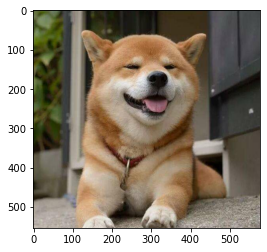

In [12]:
image_raw_data = tf.gfile.FastGFile('./data/dog.jpg', 'rb').read()

img_data = tf.image.decode_jpeg(image_raw_data)

with tf.Session().as_default() as sess:
    img_data_decode = img_data.eval()
    print('image_data decode type:\n', type(img_data_decode))
    print('image_data decode shape:\n', img_data_decode.shape)
    plt.imshow(img_data.eval())
    plt.show()

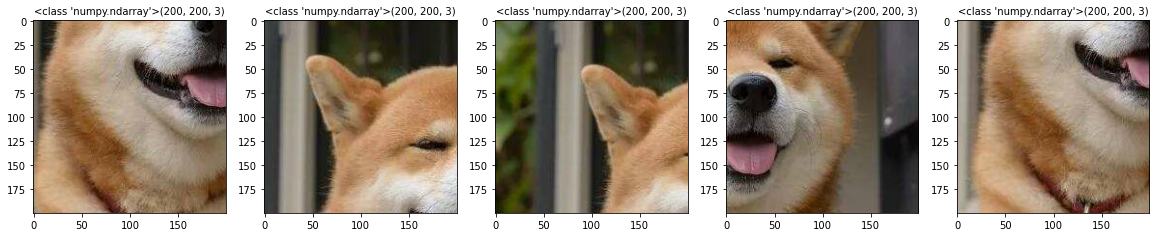

In [13]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
for i in range(5):
    ax_img = plt.subplot(1, 5, i + 1)
    rd_cropped = tf.image.random_crop(img_data, [200, 200, 3])
    rd_cropped = rd_cropped.eval(session=sess)
    ax_img.imshow(rd_cropped)
    ax_img.set_title(str(type(rd_cropped)) \
                     + str(rd_cropped.shape), 
                     fontsize=10)
plt.show()

In [14]:
sess.close()

### 上下翻转与水平翻转 
**tf.image.flip_left_right() 左右翻转  
tf.image.flip_up_down() 上下翻转**

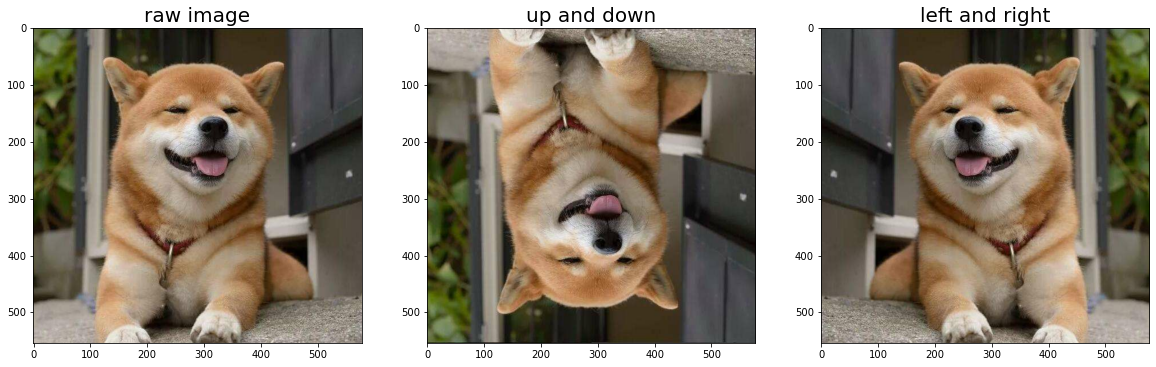

In [15]:
image_raw_data = tf.gfile.FastGFile('./data/dog.jpg', 'rb').read()

img_data = tf.image.decode_jpeg(image_raw_data)

sess = tf.Session()
fig = plt.gcf()
fig.set_size_inches(20, 10)
ax_raw = plt.subplot(1, 3, 1)
img_raw = sess.run(img_data)
ax_raw.imshow(img_raw)
ax_raw.set_title('raw image', fontsize=20)

ax_up_down = plt.subplot(1, 3, 2)
img_up_down = tf.image.flip_up_down(img_data)
img_up_down = sess.run(img_up_down)
ax_up_down.imshow(img_up_down)
ax_up_down.set_title('up and down', fontsize=20)

ax_left_right = plt.subplot(1, 3, 3)
img_left_right = tf.image.flip_left_right(img_data)
img_left_right = sess.run(img_left_right)
ax_left_right.imshow(img_left_right)
ax_left_right.set_title('left and right', fontsize=20)
plt.show()

sess.close()

### 改变图像对比度 tf.image.random_contrast() 与 tf.image.adjust_contrast()
tf.image.adjust_contrast(
&ensp;&ensp;&ensp;&ensp;images,  
&ensp;&ensp;&ensp;&ensp;contrast_factor  
)  
  
image: 输入图像   
contrast_factor: 调整对比度的浮点乘法器，对比因子，float 类型
<br><br>
tf.image.random_contrast(  
&ensp;&ensp;&ensp;&ensp;image,  
&ensp;&ensp;&ensp;&ensp;lower,  
&ensp;&ensp;&ensp;&ensp;upper,  
&ensp;&ensp;&ensp;&ensp;seed=None  
)  
  
image: 输入图像    
lower: 低值对比因子，float类型  
upper: 高值对比因子，float类型  
seed: 随机种子  
返回值如输入值同类型图像  
  
**可以看出 tf.image.adjust_contrast() 是直接指定调节对比度，tf.image.random_contrast() 则是随机调节**

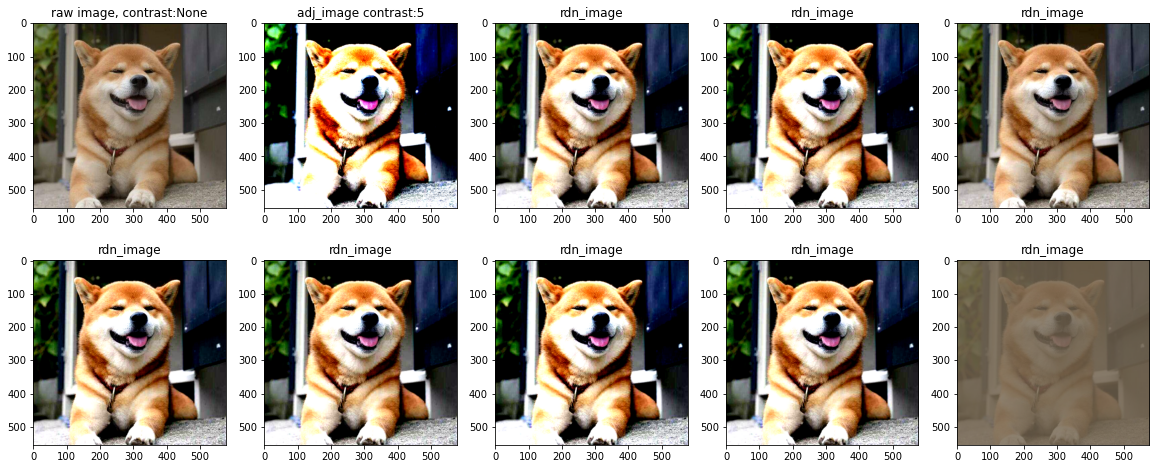

In [16]:
image_raw_data = tf.gfile.FastGFile('./data/dog.jpg', 'rb').read()

img_data = tf.image.decode_jpeg(image_raw_data)

sess = tf.Session()

fig = plt.gcf()
fig.set_size_inches(20, 8)

ax_img = plt.subplot(2, 5, 1)
ax_img.imshow(sess.run(img_data))
ax_img.set_title('raw image' + ', contrast:None', fontsize=12)

ax_img = plt.subplot(2, 5, 2)
contrast = tf.image.adjust_contrast(img_data, 5)
ax_img.imshow(sess.run(contrast))
ax_img.set_title('adj_image' + ' contrast:5', fontsize=12)

for i in range(2, 10):
    ax_img = plt.subplot(2, 5, i + 1)
    contrast = tf.image.random_contrast(img_data, 0.001, 3)
    contrast = contrast.eval(session=sess)
    ax_img.imshow(contrast)
    ax_img.set_title('rdn_image', fontsize=12)
plt.show()

sess.close()

### 白化处理
将图像的像素值转化成零均值和单位方差，图像标准化

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


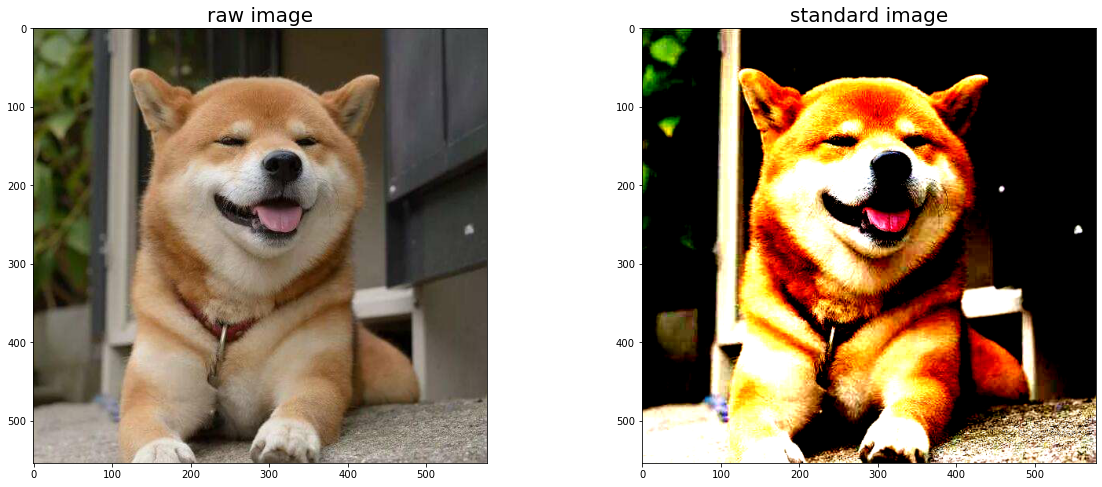

In [17]:
image_raw_data = tf.gfile.FastGFile('./data/dog.png', 'rb').read()

img_data = tf.image.decode_png(image_raw_data)

sess = tf.Session()
fig = plt.gcf()
fig.set_size_inches(20, 8)

ax_img1 = plt.subplot(1, 2, 1)
ax_img1.imshow(img_data.eval(session=sess))
ax_img1.set_title('raw image', fontsize=20)

ax_img2 = plt.subplot(1, 2, 2)
standarlization = tf.image.per_image_standardization(img_data)
ax_img2.imshow(standarlization.eval(session=sess))
ax_img2.set_title('standard image', fontsize=20)

plt.show()

sess.close()